In [178]:
import random
import numpy as np
from plotter import Plotter
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display
import pandas as pd

In [ ]:
# equation of any random line, for eg. here we have picked y = 2.5x+5
def f(x):
    return 2.5*x+5

# mathematical func to evaluate if point is above or below line, we'll use this to train our model
def isPointAboveOrBelow(x,y):
    if y - 2.5*x-5 > 0:
        return 1
    else:
        return 0

In [370]:
learning_rate = 0.001
class Perceptron:
    no = 2  #this is just number of weights we'll be having, in this case as there are only two variables(x,y) so 2
    bias = 1
    weights = []
    def __init__(self, no, bias):
        self.no = no
        self.bias = bias
        self.weights = [random.randint(1,100) for i in range(no)]
        
    #activation function, fancy name but not really tough to understand
    def activate(self, input):
        sum = 0
        for i in range(len(input)):
            sum += input[i]*self.weights[i]
        if sum > 0:
            return 1 
        else:
            return 0    

    #guess and adjust, :train_emoji:
    def train(self, input, desired):
        guess = self.activate(input)
        error = desired - guess
        if error!=0:
            for i in range(len(input)):
                self.weights[i] += input[i]*learning_rate*error            

#Now that we have a perceptron, we will create a network of them to train them individually
class NeuralNetwork:
    perceptrons = []
    def __init__(self, no_of_perceptrons):
        for i in range(no_of_perceptrons):
            self.perceptrons.append(Perceptron(2,1))
    def train(self):
        input = []
        desired = []
        for i in range(1000):
            x = random.randint(random.randint(1,50),random.randint(51, 300))
            y = random.randint(random.randint(1,50),random.randint(51, 300))
            input.append([x, y])
            desired.append(isPointAboveOrBelow(x,y))
        for i in range(1000):
            for p in range(len(self.perceptrons)):
                for inp in range(len(input)):
                    self.perceptrons[p].train(input[inp], desired[inp])   

    #majority wins!
    def activate(self,input):
        total = 0
        for p in range(len(self.perceptrons)):
            total += self.perceptrons[p].activate(input)
        if total > len(self.perceptrons)//2:
            return 1
        else:
            return 0

In [377]:
# finally, the good part
network = NeuralNetwork(5)
network.train()

In [378]:
#time to taste
correct_guesses = 0
total_guesses = 300
for i in range(total_guesses):
    x = random.randint(200,2000)
    y = random.randint(300,2000)
    guess = network.activate([x,y])
    desired = isPointAboveOrBelow(x,y)
    if guess == desired:
        correct_guesses += 1
print("accuracy of network : " , correct_guesses/total_guesses)

accuracy of network :  0.9933333333333333


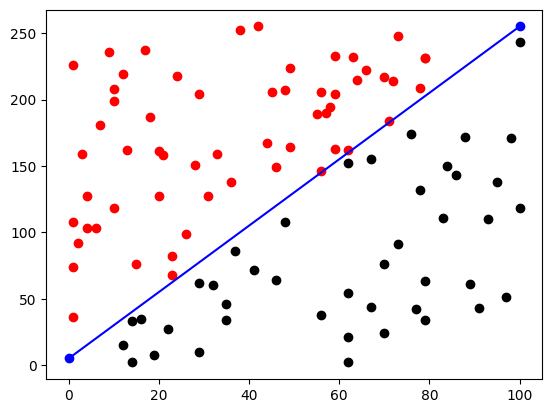

In [379]:
#this part is just to make this project look good ;)
plt.plot([0,100],[5,255] , 'bo', linestyle="-")
for i in range(100):
    x = random.randint(1,100)
    y = random.randint(1,255)
    flag = network.activate([x,y])
    clr = 'red'
    if flag == 0:
        clr = 'black'
    plt.scatter(x,y, color=clr)
    display.display(plt.gcf())
    display.clear_output(wait=True)